In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 24.7MB/s]


In [57]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
print(mobile_sales.shape)
mobile_sales.head()

(217, 2)


,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [58]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [59]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [60]:
# 2 things to check while working on Times Series Data ->
# Missing Values
# Anomalies

In [61]:
mobile_sales.set_index('DATE',inplace=True)

In [62]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


In [63]:
mobile_sales.isnull().sum()

,0
Sales,19


<Axes: xlabel='DATE'>

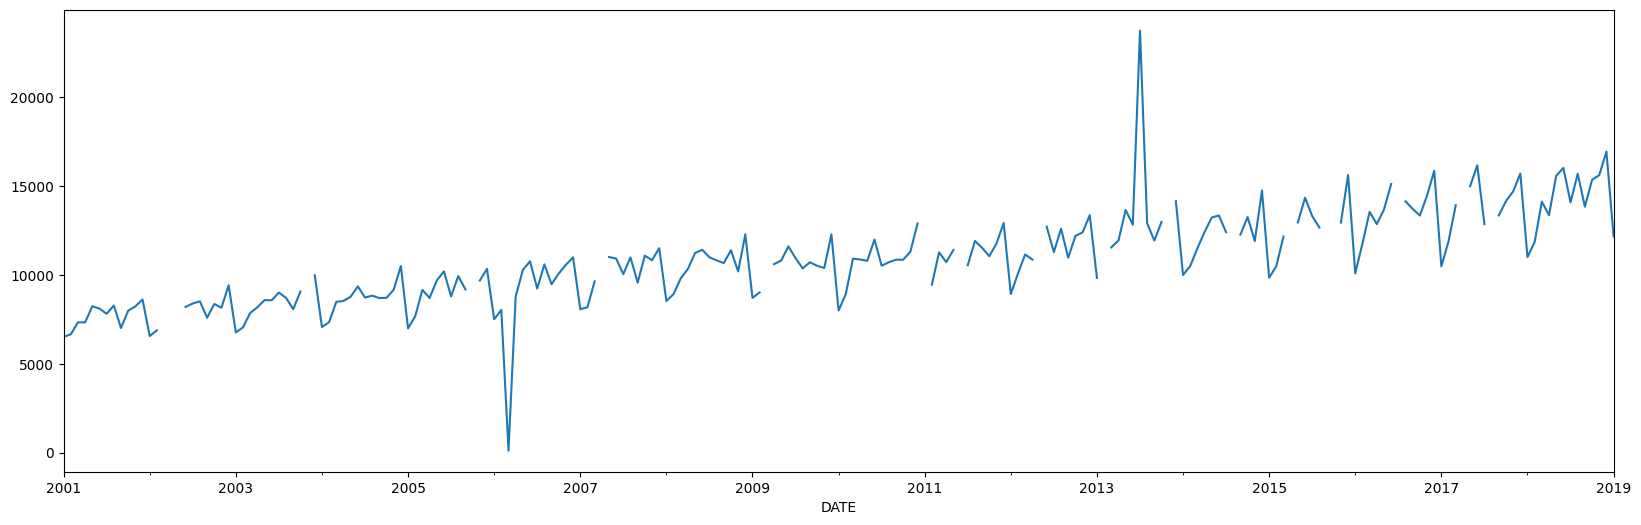

In [64]:
plt.rcParams['figure.figsize'] = (20, 6)
mobile_sales['Sales'].plot()

In [65]:
# We impute it with the value before and after the missing value

In [66]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


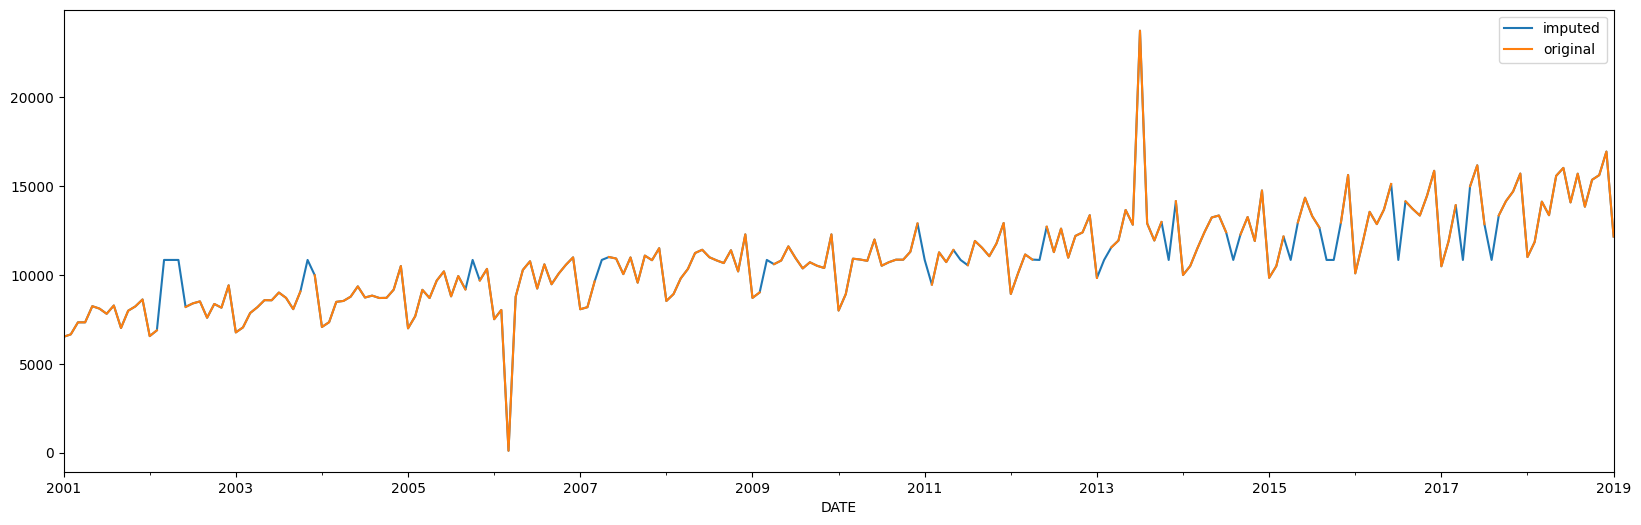

In [67]:
# lst method - Imputing it by mean of entire series

mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

**Q. Is there a better way to fill NaNs?**

Taking an average for the entire signal didn't work.

Lets try something else.

How about we take the **average of the first point before and first point after** the missing value and fill the missing value with this average.

- This makes sense, as this way, we would still be taking average, but instead of taking it for the entire signal, we take average for the specific gap in data.
- This will ensure that we're not under or over estimating the values.
- As the average value would be **unique** to each gap in signal.

For example,
- if we're missing data for February 2005,
- we can assume that the sales in that month would be an average of sales in January 2005 and March 2005.

![picture](https://drive.google.com/uc?export=view&id=1Lk-Km2n9Usx_V9ikYrlnVv0aqHDs8Meq)


This is called **Linear Interpolation**.

Let's apply this now.

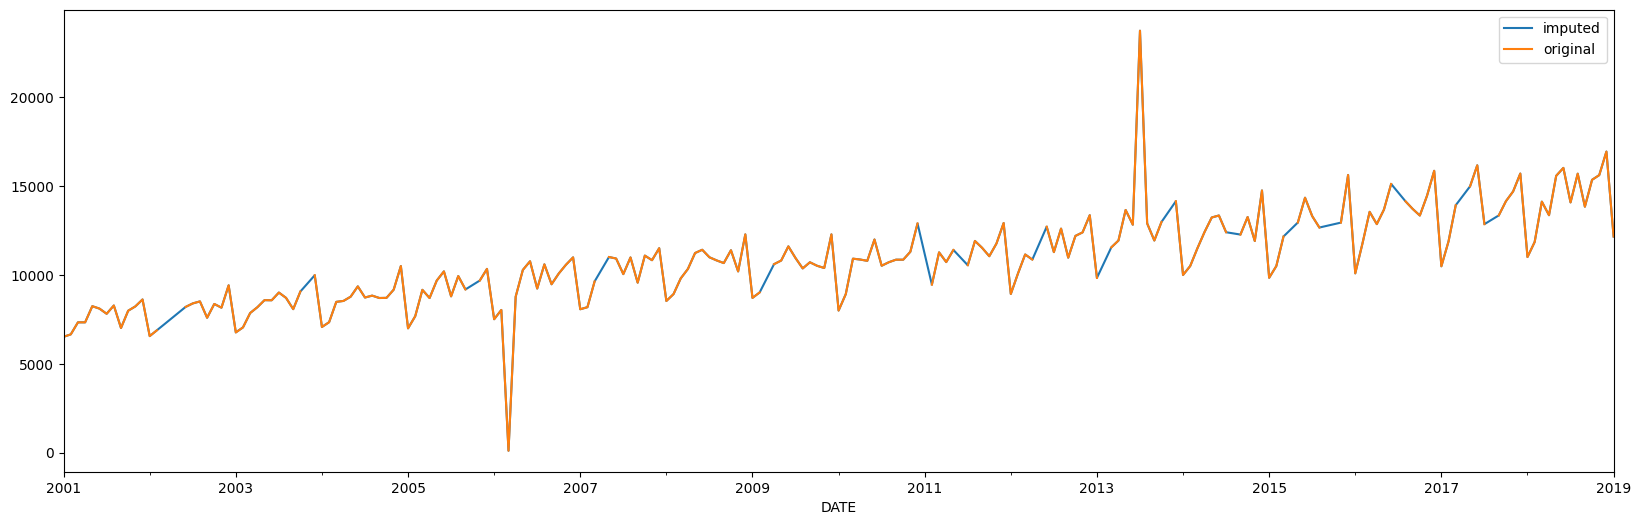

In [68]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

## Part - 2

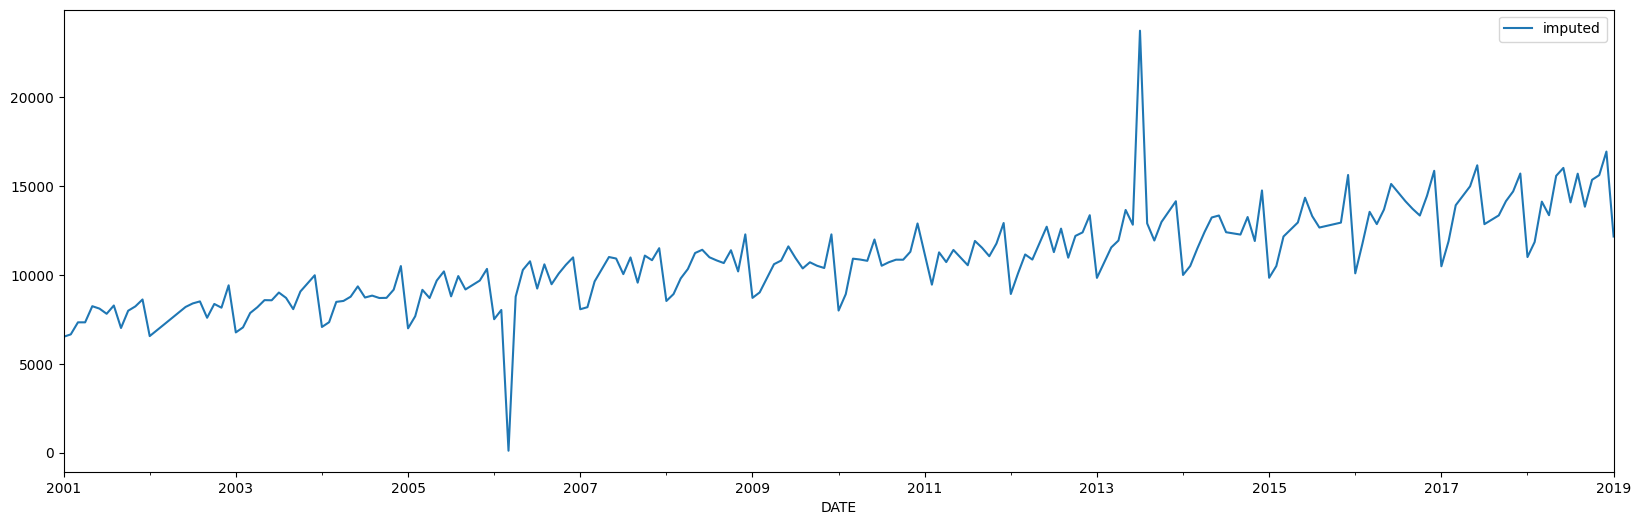

In [69]:
# Correctly interpolate the 'Sales' column (do not assign plotting Axes to the column)
mobile_sales['Sales'] = mobile_sales['Sales'].interpolate(method='linear')
# Plot the imputed series
mobile_sales['Sales'].plot(label='imputed')
plt.legend()

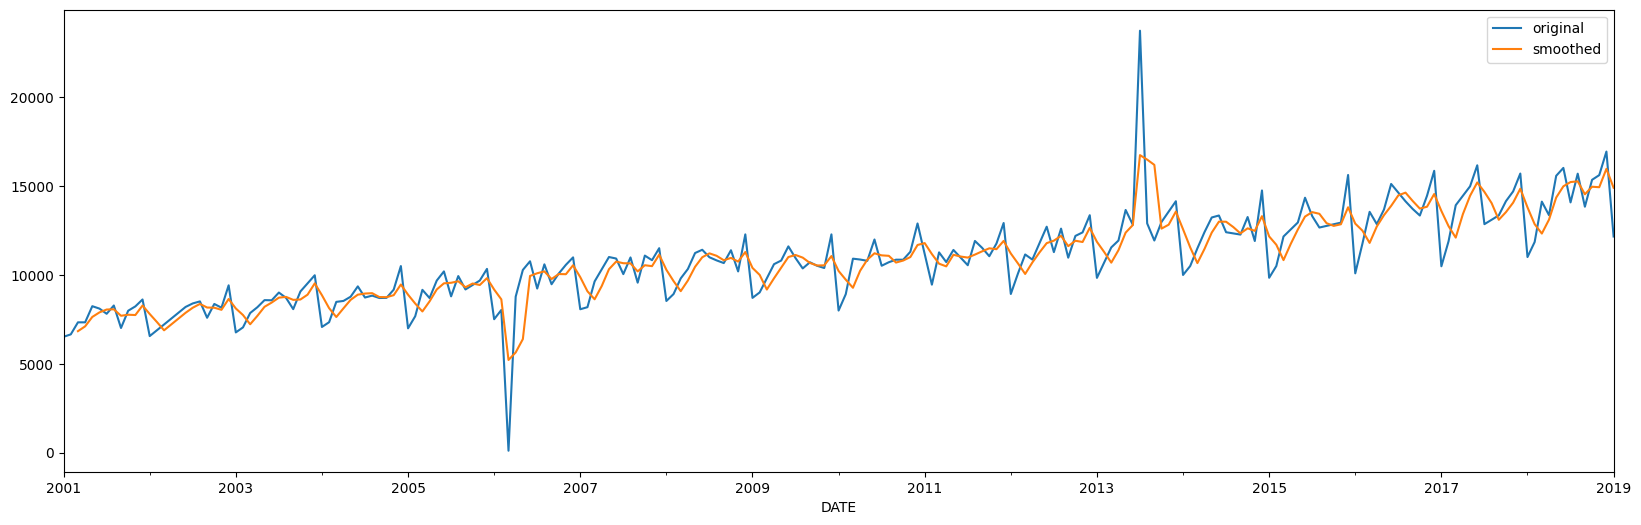

In [70]:
# Moving Average
mobile_sales['Sales'].plot(label = 'original')
mobile_sales['Sales'].rolling(window=3,center=False).mean().plot(label="smoothed")
plt.legend()


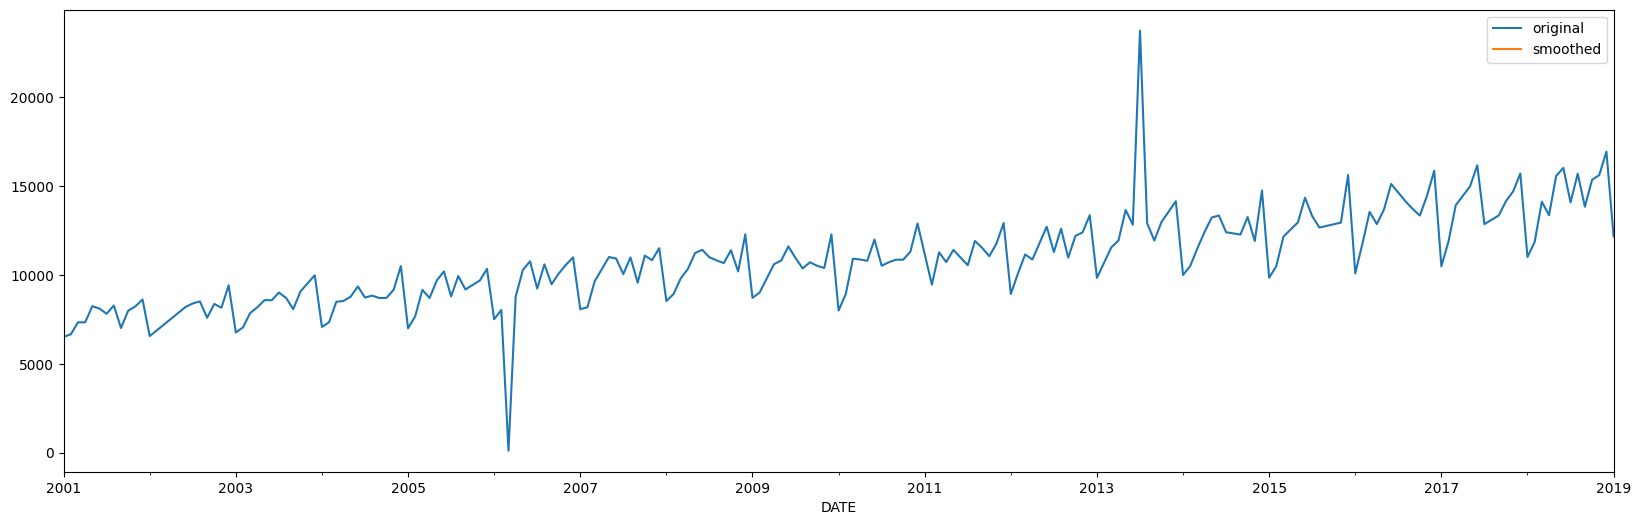

In [71]:
# Moving Average
mobile_sales['Sales'].plot(label = 'original')
mobile_sales['Sales'].rolling(window=0,center=False).mean().plot(label="smoothed")
plt.legend()


# Implementation of Additive Seasonality

In [72]:
import statsmodels.api as sm

In [73]:
sm_model =  sm.tsa.seasonal_decompose(mobile_sales.Sales,model='additive')

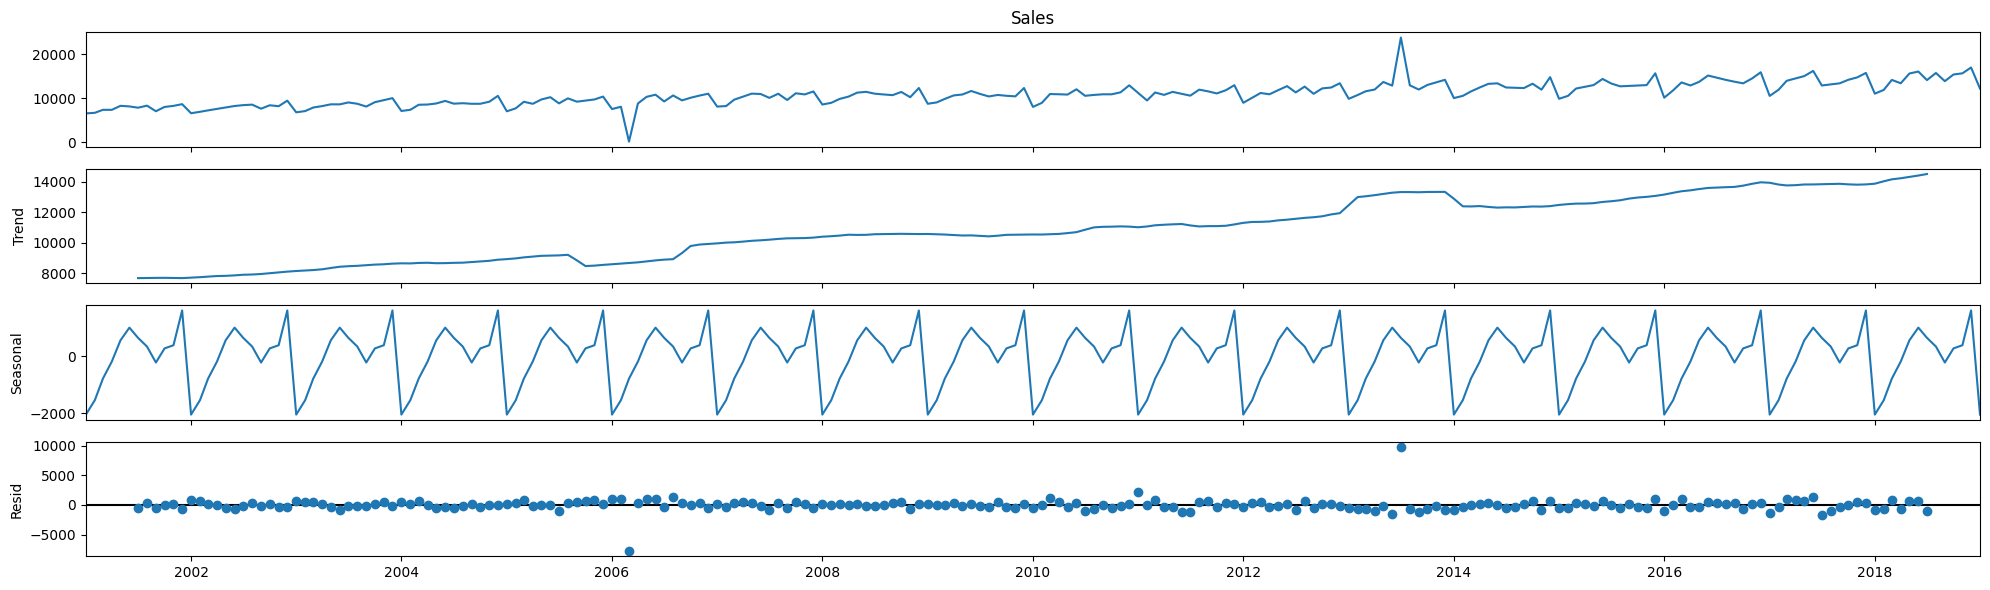

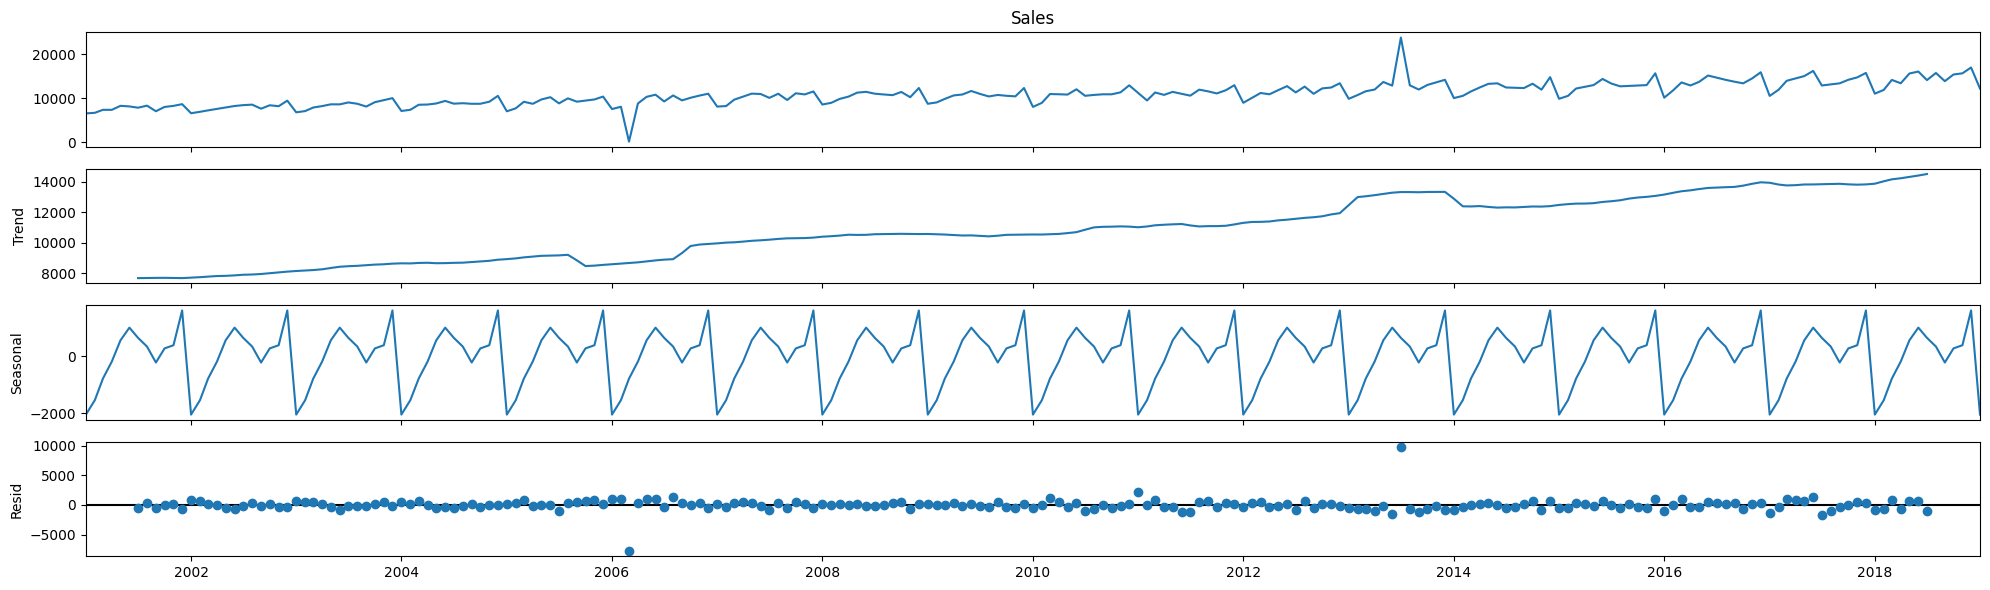

In [74]:
sm_model.plot()

In [75]:
sm_model =  sm.tsa.seasonal_decompose(mobile_sales.Sales,model='multiplicative')

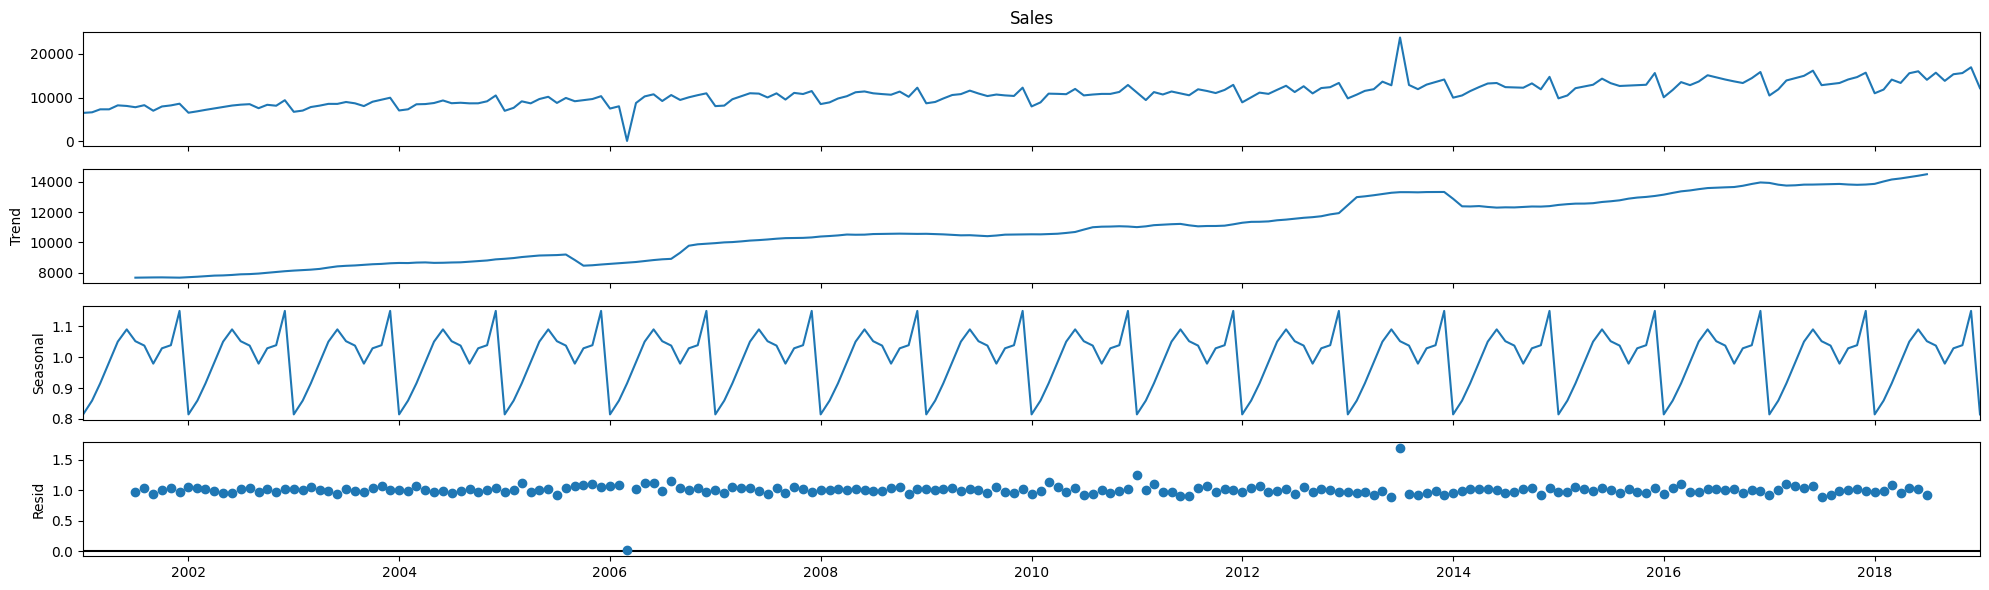

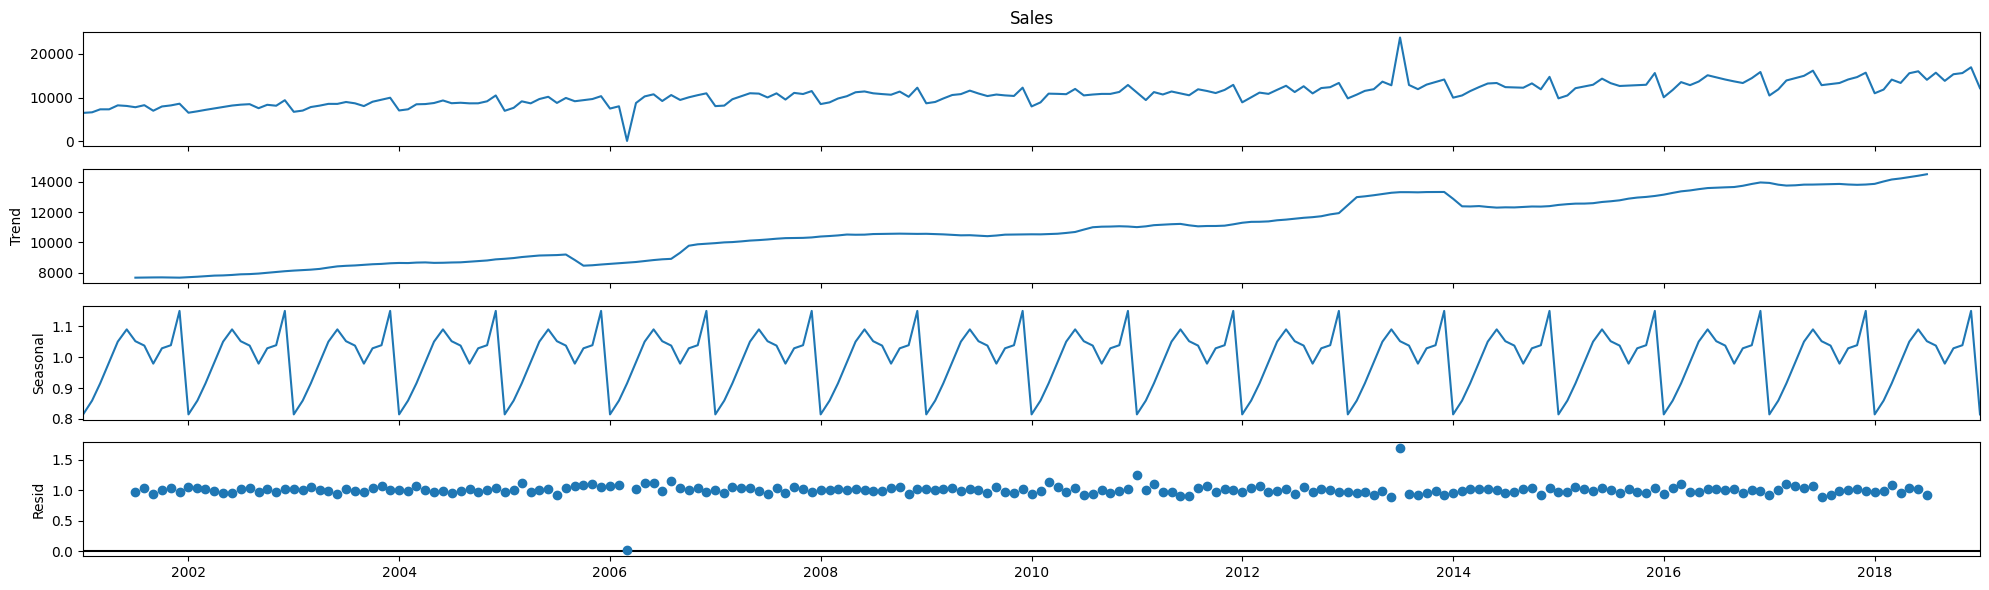

In [76]:
sm_model.plot()

## Part - 3


In [77]:
train_max_date  =  mobile_sales.index[-12]

In [78]:
train_x = mobile_sales.loc[mobile_sales.index < train_max_date]
test_x = mobile_sales.loc[mobile_sales.index >=  train_max_date]

In [79]:
train_x

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0


In [80]:
train_y

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [81]:
from sklearn.metrics import (mean_absolute_error as mae , mean_squared_error as mse , mean_absolute_percentage_error as mape)

def performane(actual,predicted):
    print("MAE:",round(mae(actual,predicted),3))
    print("MSE:",round(mse(actual,predicted)**0.5,3))
    print("MAPE:",round(mape(actual,predicted),3))

### Forcasting

In [82]:
train_x['pred'] = train_x.Sales.mean()

/tmp/ipython-input-1052435831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['pred'] = train_x.Sales.mean()


In [83]:
performane(train_x.Sales,train_x.pred)

MAE: 1849.699
MSE: 2448.763
MAPE: 0.652


In [84]:
train_x

,Sales,pred
DATE,,
2001-01-01,6519.0,10657.741463
2001-02-01,6654.0,10657.741463
2001-03-01,7332.0,10657.741463
2001-04-01,7332.0,10657.741463
2001-05-01,8240.0,10657.741463
...,...,...
2017-09-01,13349.0,10657.741463
2017-10-01,14150.0,10657.741463
2017-11-01,14698.0,10657.741463


# Navie Approach

MAE: 3546.167
MSE: 3854.067
MAPE: 0.235


/tmp/ipython-input-2124036.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x.Sales[-1]
/tmp/ipython-input-2124036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = train_x.Sales[-1]


<Axes: xlabel='DATE'>

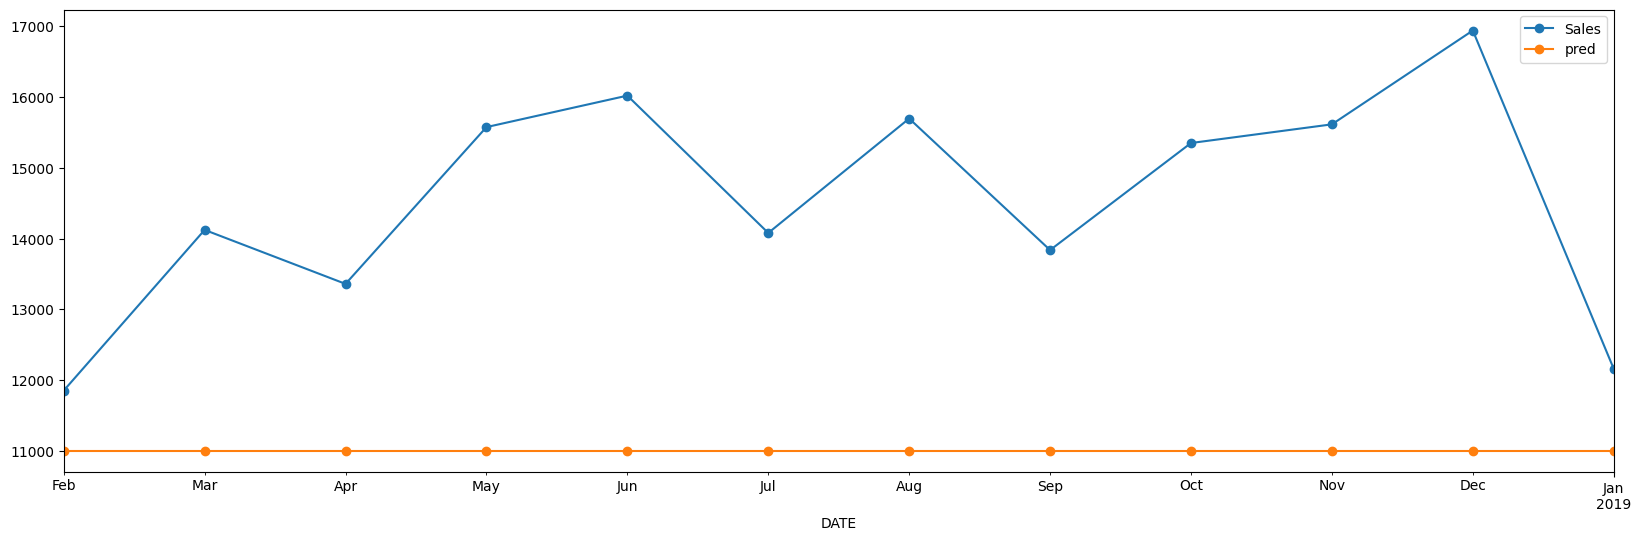

In [88]:
test_x['pred'] = train_x.Sales[-1]
performane(test_x.Sales,test_x.pred)
test_x.plot(style = '-o')

### Seasonal Naive Approach

In [92]:
for i in test_x.index:
    test_x.loc[i,'pred'] =  train_x.loc[i-pd.offsets.dateOffset(year=1)]['Sales']

performane(test_x.Sales,test_x.pred)

AttributeError: module 'pandas.tseries.offsets' has no attribute 'dateOffset'

# 4.Drift Method

In [ ]:
y_t = train_x['Sales'][-1]
m =  (y-t - train_x['Sales'][0])/len(train_x)


/tmp/ipython-input-3459894897.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-1]
